In [ ]:
# Start writing code here...
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Beta distribution with different alpha and beta values')

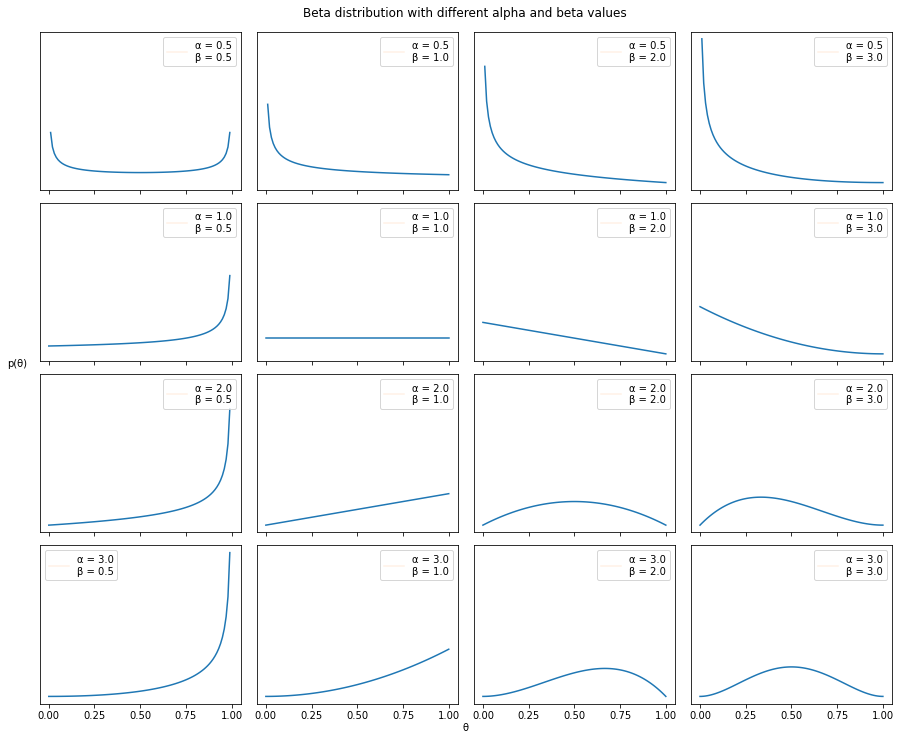

In [ ]:
# Let us first set up some parameter values
params = [0.5, 1, 2, 3]
# and create 100 equally divided points for x to evaluate the parameter values
x = np.linspace(0, 1, 100)

# We create a figure and axes objects to show the distribution in many graphs
fig, ax = plt.subplots(len(params), len(params),
                        sharex=True, sharey=True, 
                        figsize = (12, 10), constrained_layout = True)
# For each of the subplot we show the beta prior given different parameter alpha and beta values
for i in range(len(params)):
    for j in range(len(params)):
        # We define alpha and beta using the specified list of values in params
        alpha = params[i]
        beta = params[j]
        # and calculate the probability density for each interval
        y = stats.beta(alpha, beta).pdf(x)

        # Finally we use ax.plot to make the probability density plots on the elements in two axes
        ax[i, j].plot(x,y)
        ax[i, j].plot(0,0, 
                      label = "α = {:2.1f}\nβ = {:2.1f}".format(alpha, beta),
                      alpha = 0.1)
        # Of course, we should show the legend on each plot to inform the parameter values
        ax[i, j].legend()


# Now we will specify the axis ticks using set_yticks and set_xticks
ax[1,0].set_xticks([0, 0.25, 0.5, 0.75, 1])
ax[1,0].set_yticks([])
# and add overarching x and y axis titles
# We use fig.text to specify theta at the center of the x axis
fig.text(0.5, -0.01, 'θ', ha='center')
# Similarly, we use fig.text to specify p(theta) at the center of the y axis
fig.text(-0.03, 0.5, 'p(θ)', va='center', rotation=0)
# and the title
plt.suptitle("Beta distribution with different alpha and beta values")

## Plot Beta Posterior Visualization

When we observe new evidence, we can summarize the logical consequences of a model and data by summarizing the posterior. The posterior is the result of a Bayesian analysis and is represented as a distribution, similar to we choose priors. This distribution shows how plausible the values are given the data and out model. At the peak of the posterior distribution, or we call the mode of the posterior, we can grasp the most probable value throughout the possible range.

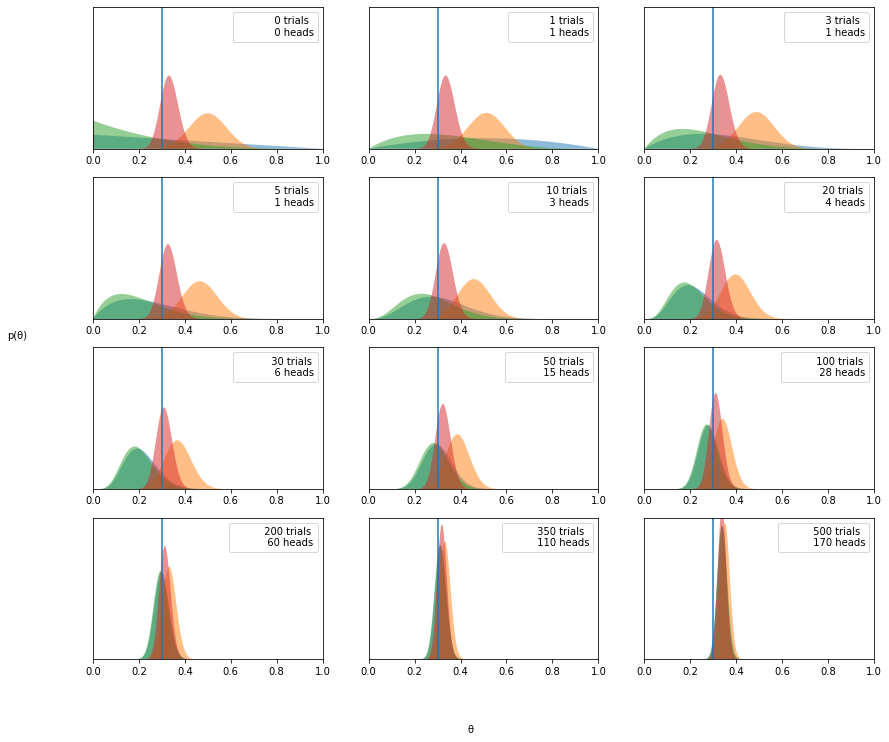

In [ ]:
# We can simulate if observing more data makes the posterior distribution more close to the data, and less data the posterior distribution will be closed to the prior distribution.abs

# We start with creating a list of different number of trials and success
n_trials = [0, 1, 3, 5, 10, 20, 30, 50, 100, 200, 350, 500]
data = [0, 1, 1, 1, 3, 4, 6, 15, 28, 60, 110, 170]
# Specify ground truth
theta_real = 0.30

beta_params = [(1,2), (20,20), (1,4), (50, 100)]

# Let x be an equally divided x axis values
x = np.linspace(0,1,200)

for idx, N in enumerate(n_trials):
    # We initialize the first visualization using the if condition
    if idx ==0:
         # we set the figure size, the number of subplots, and the x-axis label
         fig, ax = plt.subplots(4, 3, sharex = True, sharey = True, figsize = (14, 12))
         plt.subplot(4, 3, 1)
    # Then for every plot, remove the x
    else:
        plt.subplot(4, 3, idx+1)
    
    # We create y as a variable to store observed data
    y = data[idx]

    for (a_prior, b_prior) in beta_params:
        # Create the simulated posterior distribution
        posterior_theta = stats.beta.pdf(x, a_prior + y, b_prior + N - y)
        # and fill the color to discern each posterior distribution
        plt.fill_between(x, 0, posterior_theta, alpha = 0.5)
    # Next, we use plt.axvline to add a vertical line showing the true value on each plot
    plt.axvline(theta_real)
    # give the labels
    plt.plot(0,0, label = f'{N:4d} trials\n{y:4d} heads', alpha=0)
    # set the x and y axis limits
    plt.xlim(0,1)
    plt.ylim(0, 20)
    plt.legend()
    plt.yticks([])
fig.text(0.5, 0.04, 'θ', ha='center')
fig.text(0.04, 0.5, 'p(θ)', va='center', rotation=0)
plt.show()